## EDA: Portuguese Higher and Secondary Education

This notebook explores the shapes, trends, and relationships of the data present in the modelling tables created from the datasets.

### Imports and reading datasets

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../scripts'))
import maps as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #must have

lower_model_df = pd.read_csv("../../data/results/lower_ed_scored.csv")
higher_model_df = pd.read_csv("../../data/results/higher_ed_scored.csv")

### 6. Performance Throughout highered is more influential than social economic factors on dropout likelihood (Approved)

In [2]:
print("Higher Ed Columns:", higher_model_df.columns.tolist())
higher_model_df.head()

Higher Ed Columns: ['marital_status', 'course', 'daytime/evening_attendance', 'previous_qualification', 'previous_qualification_(grade)', 'nacionality', "mother's_qualification", "father's_qualification", "mother's_occupation", "father's_occupation", 'admission_grade', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'age_at_enrollment', 'international', 'curricular_units_1st_sem_(credited)', 'curricular_units_1st_sem_(enrolled)', 'curricular_units_1st_sem_(evaluations)', 'curricular_units_1st_sem_(approved)', 'curricular_units_1st_sem_(grade)', 'curricular_units_1st_sem_(without_evaluations)', 'curricular_units_2nd_sem_(credited)', 'curricular_units_2nd_sem_(enrolled)', 'curricular_units_2nd_sem_(evaluations)', 'curricular_units_2nd_sem_(approved)', 'curricular_units_2nd_sem_(grade)', 'curricular_units_2nd_sem_(without_evaluations)', 'unemployment_rate', 'inflation_rate', 'gdp', 'target', 'dropout_risk(all)', 'dropout_risk(

,marital_status,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,mother's_occupation,father's_occupation,...,curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target,dropout_risk(all),dropout_risk(external),dropout_risk(performance)
0,1,171,1,1,122.0,1,19,12,5,9,...,0,0.000000,0,10.8,1.4,1.74,Dropout,45.31,48.30,50.50
1,1,9254,1,1,160.0,1,1,3,3,3,...,6,13.666667,0,13.9,-0.3,0.79,Graduate,43.29,93.26,4.60
2,1,9070,1,1,122.0,1,37,37,9,9,...,0,0.000000,0,10.8,1.4,1.74,Dropout,99.99,94.94,99.99
3,1,9773,1,1,122.0,1,38,37,5,3,...,5,12.400000,0,9.4,-0.8,-3.12,Graduate,13.76,23.88,15.88
4,2,8014,0,1,100.0,1,37,38,9,9,...,6,13.000000,0,13.9,-0.3,0.79,Graduate,5.15,33.73,7.99


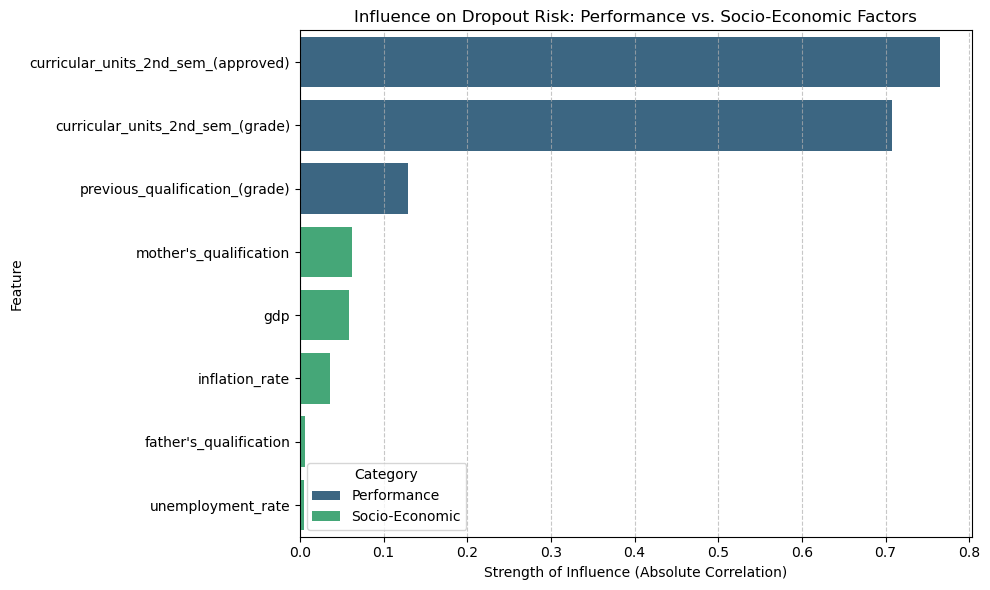

In [3]:
performance_cols = [
    'curricular_units_2nd_sem_(grade)', 
    'curricular_units_2nd_sem_(approved)', 
    'previous_qualification_(grade)'
]

se_cols = [
    "mother's_qualification", 
    "father's_qualification", 
    'unemployment_rate', 
    'inflation_rate', 
    'gdp'
]

#Calculate correlation with the overall dropout risk
correlations = higher_model_df[performance_cols + se_cols + ['dropout_risk(all)']].corr()['dropout_risk(all)'].abs().sort_values(ascending=False)
correlations = correlations.drop('dropout_risk(all)') 

#Dataframe for plotting
plot_df = correlations.reset_index()
plot_df.columns = ['Feature', 'Correlation Strength']
plot_df['Category'] = plot_df['Feature'].apply(lambda x: 'Performance' if x in performance_cols else 'Socio-Economic')

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Correlation Strength', y='Feature', hue='Category', palette='viridis')
plt.title('Influence on Dropout Risk: Performance vs. Socio-Economic Factors')
plt.xlabel('Strength of Influence (Absolute Correlation)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

### 7. Healthier Students Perform Better in Secondary School (Rejected)

In [4]:
print("Secondary Ed Columns:", lower_model_df.columns.tolist())
lower_model_df.head()

Secondary Ed Columns: ['sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'target', 'fail_risk']


,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,...,romantic,famrel,freetime,goout,dalc,walc,health,absences,target,fail_risk
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,4,3,4,1,1,3,4,pass,15.07
1,F,17,U,GT3,T,1,1,at_home,other,course,...,no,5,3,3,1,1,3,2,pass,9.74
2,F,15,U,LE3,T,1,1,at_home,other,other,...,no,4,3,2,2,3,3,6,pass,42.60
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,3,2,2,1,1,5,0,pass,10.97
4,F,16,U,GT3,T,3,3,other,other,home,...,no,4,3,2,1,2,5,0,pass,4.47


/var/folders/vt/yz3j_84x1qg_nlvpgk_73d500000gn/T/ipykernel_71385/14383314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='health', y='fail_risk', data=lower_model_df, palette='RdYlGn_r')


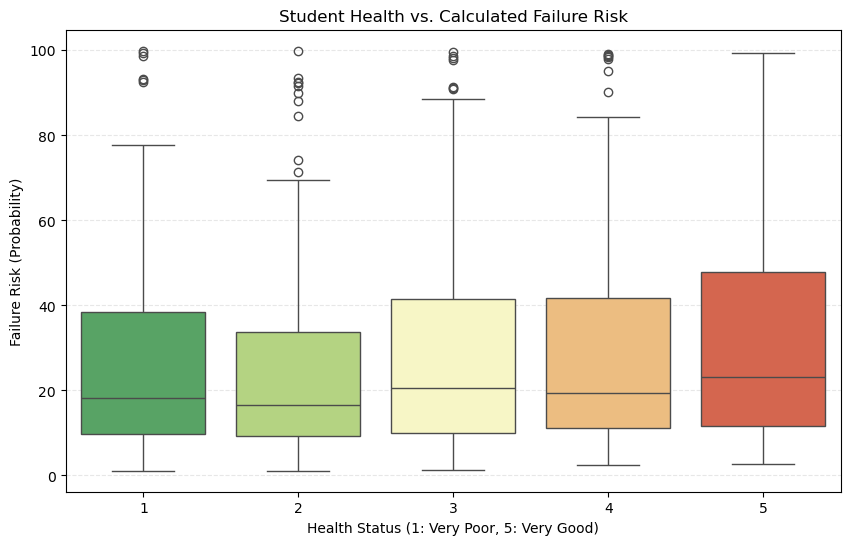

In [5]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='health', y='fail_risk', data=lower_model_df, palette='RdYlGn_r')

plt.title('Student Health vs. Calculated Failure Risk')
plt.xlabel('Health Status (1: Very Poor, 5: Very Good)')
plt.ylabel('Failure Risk (Probability)')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

This graph disproves the hypothesis as the median failure risk actually increases as students reach the highest health level

Median Risk:
- Students with level 2 health (fairly poor) show that the lowest median risk at ~15%
- Students with Level 5 health (very good) have the highest median risk at ~25%

Visual Spread:
- Students with level 5 health is positioned higher than students with level 1. This indicates that the middle ~50% (Level 5 Students) face higher range of failure risk than the least healthy group.

Outliers:
- All health levels except level 5 have several outliers, representing specific students with a ~100% failure risk regardless of their health status.

### 8. Students With a Higher Commute Time Perform Worse Than Those With Lower Communte Time (Partial Proven)

/var/folders/vt/yz3j_84x1qg_nlvpgk_73d500000gn/T/ipykernel_71385/2719755229.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='traveltime', y='fail_risk', data=lower_model_df, palette='magma', capsize=.1)


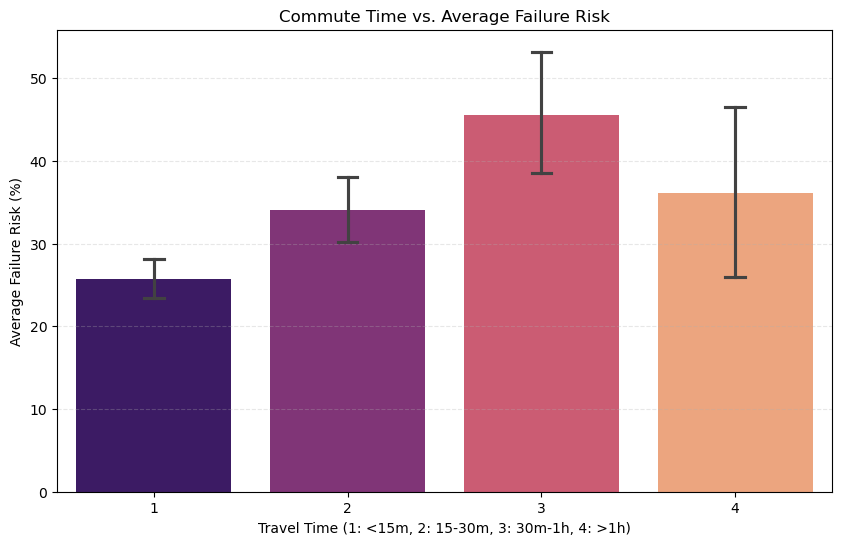

In [6]:
plt.figure(figsize=(10, 6))

#The average risk per travel time category
sns.barplot(x='traveltime', y='fail_risk', data=lower_model_df, palette='magma', capsize=.1)

plt.title('Commute Time vs. Average Failure Risk')
plt.xlabel('Travel Time (1: <15m, 2: 15-30m, 3: 30m-1h, 4: >1h)')
plt.ylabel('Average Failure Risk (%)')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

This graph partially approves

- First three categories supports hypothesis: As travel time increases from less than 15 minutes to 30m-1h, the average failure risk climbs from ~25% to over ~45%.
- The forth category contradicts as the avereage failure risk actually drops to ~35%

Important to Note:
- Category four has a large error bars, suggesting there are far fewer students in this group, making the data less reliable.